# Review of Probability Theory

## Contents

- [Imports](#section1)
- [General Probability Rules](#section2)
- [Random Variables](#section3)
    - [Discrete random variables](#subsection3.1)
    - [Continuous random variables](#subsection3.2)
- [The `scipy.stats` Module](#section4)
- [Expected Values and Variances](#section5)
    - [Definitions](#subsection5.1)
    - [Expected values and variances of commonly used distributions](#subsection5.2)
    - [Properties of expected values and variances](#subsection5.3)

## Imports <a id="section1"></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import binom
from scipy.stats import norm
from scipy.stats import poisson

## General Probability Rules <a id="section2"></a>

<div class="alert alert-block alert-danger">
<b>Notes: Rule of Complements: </b> If $A$ is any event, then we have
$$
P(A) = 1 - P(A^c),
$$
where $A^c$ is the <b>complement</b> of $A$, i.e. the event that $A$ does not occur.
</div>

<div class="alert alert-block alert-danger">
<b>Notes: General Addition Rule: </b> For events $A_1$ and $A_2$, 
$$
P(A_1\text{ or }A_2) = P(A_1) + P(A_2) - P(A_1 \text{ and } A_2).
$$
</div>

If events $A_1$ and $A_2$ are **mutually exclusive**, meaning that at most one of them can occur, then $P(A_1 \text{ and } A_2)=0$, so 

$$
P(A_1\text{ or }A_2) = P(A_1) + P(A_2).
$$

The addition rule can be generalized to $n$ mutually exclusive events $A_1$, ..., $A_n$, such that $P(\text{one of }A_1\text{ through }A_n) = P(A_1) + P(A_2) + ... + P(A_n)$. 

<div class="alert alert-block alert-danger">
<b>Notes: Conditional Probability: </b> The <b>conditional probability</b> of $A$ given $B$ is expressed as
$$
P(A|B) = \frac{P(A \text{ and } B)}{P(B)}.
$$
It also implies that 
$$
P(A \text{ and } B) = P(A|B)P(B).
$$
</div>

<div class="alert alert-block alert-danger">
<b>Notes: Multiplication Rule for Independent Events: </b> If events $A$ and $B$ are <b>probabilistically independent</b>, then
$$
P(A\text{ and }B) = P(A)P(B).
$$
</div>

## Random Variables <a id="section3"></a>
### Discrete random variables <a id="subsection3.1"></a>
A random variable $X$ is defined to be **discrete** if its possible outcomes are finite or countable. A few examples are given below.
1. The result of rolling a die
2. The preference of one randomly selected customer for Coke or Pepsi (Bernoulli distribution)
3. Among 10 randomly selected customers, the number of people who prefer Coke over Pepsi (binomial distribution) 
4. The number of patients arriving in an emergency room within a fixed time interval (Poisson distribution)

<div class="alert alert-block alert-danger">
    <b>Notes: </b> For a discrete random variable $X$ with $k$ possible outcomes $x_j$, $j=1, 2, ..., k$, the <b>probability mass function (PMF)</b> is given as:
    \begin{align}
    P(X=x_j) = p_j, \text{   for each }j=1, 2, ..., k,
    \end{align}
where $p_j$ is the probability of the outcome $x_j$ and all $p_j$ must satisfy 
    \begin{cases}
    0\leq p_j \leq 1 \text{  for each }j=1, 2, ..., k\\
    \sum_{j=1}^kp_j = 1
    \end{cases}
</div>

<div class="alert alert-block alert-success">
<b>Example 1:</b> Suppose that in Singapore, the percentage of customers who prefer Coke is $p=65\%$, and the remaining $1-p=35\%$ customers prefer Pepsi. Now we randomly survey $n=10$ customers, and the number of surveyed customers who prefer Coke is $X$. What is the probability that $X=8$?
</div>

It is obvious that the random variable $X$ follows a binomial distribution because:
- There are totally $n=10$ independent experiments;
- Each experiment has two different outcomes: Coke or Pepsi;
- Each outcome has a fixed probability: $p=65\%$ or $1-p=35\%$.

Calculations related to the binomial distribution can be conducted by using the `binom` object imported from the `scipy.stats` module. Here, the probability $P(X=8)$ is the calculated by the code below, where the `pmf()` method refers to the probability mass function.

In [10]:
x = 8                                # The number of customers who prefer Coke
n = 10                               # Total number of customers
p = 0.65                             # Probability of people who prefer Coke

pmf = binom.pmf(x, n, p)
print(f'The probability of 8 customers preferring coke is {pmf}')

The probability of 8 customers preferring coke is 0.1756529531059573


<div class="alert alert-block alert-success">
    <b>Example 2:</b> Let $X$ denote the random variable representing the number of surveyed customers who prefer Coke in <b>Example 1</b>. Plot the discrete probability distribution of $X$.
</div>

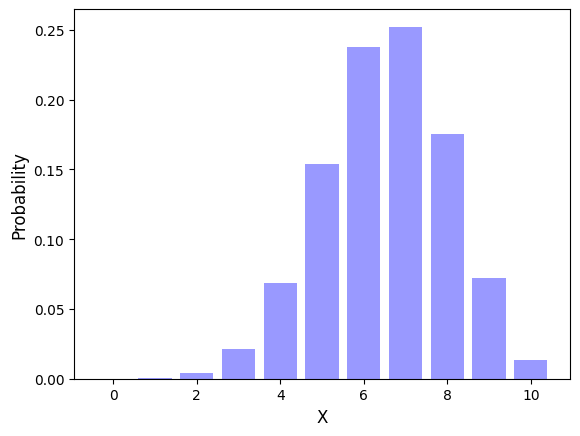

In [12]:
n = 10                                     # Total number of customers
p = 0.65                                   # Probability of people who prefer Coke
x = np.arange(n+1)                         # All possible numbers of customers who prefer Coke (instead of single number)

pmfs = binom.pmf(x, n, p)                  # The PMF of the random variable X

plt.bar(x, pmfs, color='b', alpha=0.4)     # Bar chart for showing the distribution

plt.xlabel('X', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.show()

In this example, the random variable $X$ is taking an array of integers from zero (all guesses are incorrect) to ten (all guesses are correct) in calculating the PMF values. The `pmf()` method returns the PMF value of each element in the array.

<div class="alert alert-block alert-danger">
    <b>Notes: </b> The <b>cumulative distribution function (CDF)</b> of a random variable $X$ is defined as 
    \begin{align}
    F(x) = P(X\leq x).
    \end{align}
</div>

<div class="alert alert-block alert-success">
<b>Example 3:</b> Consider the survey in <b>Example 1</b>, what is the probability that the majority of the surveyed customers prefer Coke.
</div>

The probability that the majority of surveyed customers prefer Coke can be written as $P(X \geq 6) = 1 - P(X \leq 5) = 1- F(5)$. Here, $F(\cdot)$ is the cumulative distribution function, and its value can be calculated using the `cdf()` method of the `binom` object. 

In [14]:
x = 5                                # The number of customers who prefer Coke
n = 10                               # Total number of customers
p = 0.65                             # Probability of people who prefer Coke

prob = 1 - binom.cdf(x, n, p)        # Calculate the probability
print(f'The probability is {prob}')

The probability is 0.7514955091185547


<div class="alert alert-block alert-info">
<b>Question 1:</b> Plot the CDF of the random variable $X$ described in <b>Example 1</b>. 
</div>

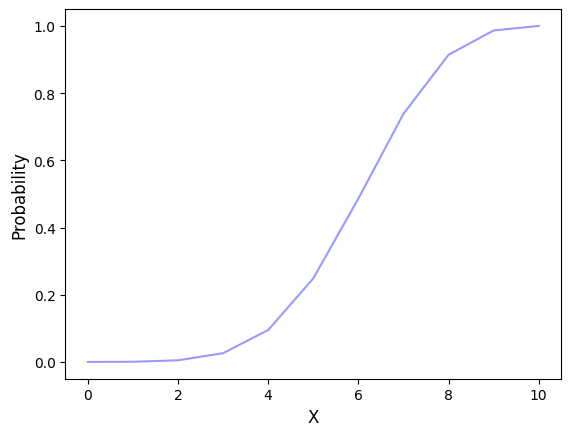

In [15]:
# Plot the CDF of the rnadom variable $X$ as described in Example 1
n = 10                                     # Total number of customers
p = 0.65                                   # Probability of people who prefer Coke
x = np.arange(n+1)                         # All possible numbers of customers who prefer Coke (instead of single number)

cdf = binom.cdf(x, n, p)                  # The CDF of the random variable X

plt.plot(x, cdf, color='b', alpha=0.4)    # Line chart for showing the distribution

plt.xlabel('X', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.show()

In example above, the proportion of customers who prefer Coke was fixed to be $65\%$, and the number of customers is fixed to be 10. You may use the [Programming for Business Analytics](https://appiora.nus.edu.sg/learndao/) website (**Topic: Review of Probability Theory**) to explore how these parameters affect the shape of the binomial distribution.  

### Continuous random variables <a id="subsection3.2"></a>
A variable $X$ is a **continuous random variable** if takes all values in an interval of numbers. Random variables following uniform, normal (Gaussian) and exponential distributions are all continuous variables.  

For continuous random variables, there is no PMF as the discrete random variables, because $P(X=x)=0$ for all values of $x$. Only intervals of values have positive probabilities, such as $P(0 \leq x \leq 10)$. The CDF for a continuous random variable has the same definition as the discrete case, which is $F(x)=P(X\leq x)$. Based on the CDF, we have other definitions listed as follows.

<div class="alert alert-block alert-danger">
    <b>Notes: </b> Let $F(x) = P(X\leq x)$ be the CDF of a continuous random variable $X$, then
    <li> The derivative $f(x) = \frac{d F(x)}{dx}$ of the CDF $F(x)$ is called the <b>probability density function (PDF)</b> of $X$. This definition also implies that $F(x) = \int_{-\infty}^{x}f(t)dt$.
    <li> The inverse of CDF $F(x)$, denoted by $F^{-1}(q)$, is called the <b>Percent Point Function (PPF)</b>, where $q$ is the given cumulative probability. This function is sometimes referred to as the <b>inverse cumulative distribution function</b> or the <b>quantile function</b>.
</div>

In the [Programming for Business Analytics](https://appiora.nus.edu.sg/learndao/) website (**Topic: Review of Probability Theory**), we are using a standard normal distribution as an example to illustrate the definition of CDF, PDF, and PPF. You are encouraged to play with the interactive data visuals to better understand the definition of these functions.

Another important property of the CDF is given below.

<div class="alert alert-block alert-danger">
    <b>Notes: </b> For a continuous random variable $X$ and given values $x_1 \leq x_2$, then the probability 
    \begin{align}
    P(x_1 \leq X \leq x_2) = P(X \leq x_2) - P(X \leq x_1) = F(x_2) - F(x_1).
    \end{align}
</div>

<div class="alert alert-block alert-success">
    <b>Example 4: </b> The annual returns of an emerging markets exchange-traded fund (ETF) have an expected return of $20.60\%$ and a standard deviation of $30.85\%$. Assume the returns are normally distributed. 
<li>What is the probability that returns are worse than $−30\%$?</li>
<li>An investor is interested in finding the value of $x$, such that the probability of having a return worse than $x$ is no larger than a given probability $\alpha=0.01$. What is the value of $x$?
</div>

Let $X$ be a random variable indicating the ETF returns, then the probability that $X\leq-30\%$ can be written as $P(R\leq 30\%) = F(-30\%)$, where $F(\cdot)$ denotes the CDF of the normally distributed variable. 

In [16]:
mean = 20.60                  # Expected return
std = 30.85                   # Standard deviation of the return
x = - 30                          

prob = norm.cdf(x, mean, std) # Probability of the return worse than -30%
print(f'The probability is {prob}')

The probability is 0.05048236736066858


Notice that the value of $x$ should satisfy $P(X\leq x) = F(x) = \alpha$, or $x = F^{-1}(\alpha)$, where $F^{-1}(\cdot)$ is the inverse distribution function or the percent point function. It can be calculated using the `ppf()` method of the `norm` object, where the second argument `loc` and the third argument `scale` respectively specify the mean and standard deviation of the normal distribution. 

In [18]:
mean = 20.60                  # Expected return
std = 30.85                   # Standard deviation of the return
alpha = 0.01                   

x = norm.ppf(alpha, mean, std)
print(f'The value of x is {x}')

The value of x is -51.16783191415994


Here, the value of $x$ is referred to as the **value-at-risk** or **VaR** with $1-\alpha=0.99$ confidence.

## The `scipy.stats` Module <a id="section4"></a>

In previous sections, we used objects imported from the `scipy.stats` module to conduct calculations for different distributions. The syntax of calling computing tools of these objects can be generalized as follows: 

<center><b><code><i>object.method</i>(<font color='blue'><i>value</i></font>, <font color='blue'><i>shape_param_1</i></font>, <font color='blue'><i>shape_param_2</i></font>, ... )</code></b></center>

- <b><code><i>object</i></code></b> is the object of a specific type of distribution, such as <code>binom</code> for binomial and <code>norm</code> for normal distributions; 
- <b><code><i>method</i></code></b> specifies the distributional function, such as `pdf()` for PDF, `pmf()` for PMF, `cdf()` for CDF, and `ppf()` for PPF;
- <b><code><font color='blue'><i>value</i></font></code></b> is the value(s) of the random variable <b><code><i>method</i></code></b>;
- <b><code><font color='blue'><i>shape_param_1</i></font></code></b>, <b><code><font color='blue'><i>shape_param_2</i></font></code></b>, ... are the parameters specifying the shape of the distribution, such as the mean and the standard deviation specify the shape of a normal distribution.

<div class="alert alert-block alert-success">
<b>Example 5: </b> The records of a hospital show that the number of patients arriving between 6:00 P.M. and 7:00 P.M. has a Poisson distribution with parameter $\mu = 6.9$. Determine the probability that between 6:00 P.M. and 7: P.M., 
<li> The number of patients arriving at the hospital is exactly four. </li>
<li> The number of patients arriving at the hospital is between four and ten, inclusive. </li>
<li> Let $X$ denote the number of patients arriving at the hospital. Plot the distribution of $X$, as $X$ is between zero and 20, inclusive. </li>
</div>

Because the random variable follows Poisson distribution, we use the `poisson` object imported from the `scipy.stats` module to do the calculation. The shape of the Poisson distribution is specified by the mean value, which is $\mu=6.9$, in this example.

In [19]:
mu = 6.9
prob = poisson.pmf(4, mu)
print(f'P(X=4) = {prob}')

P(X=4) = 0.09518164275949798


In [20]:
mu = 6.9
prob = poisson.cdf(10, mu) - poisson.cdf(3, mu)
print(f'P(4 <= X <= 10) = {prob}')

P(4 <= X <= 10) = 0.8212956204866553


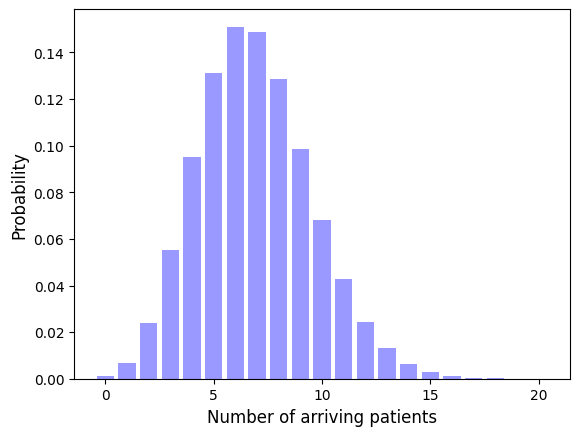

In [21]:
mu = 6.9
x = np.arange(21)

pmfs = poisson.pmf(x, mu)
plt.bar(x, pmfs, color='b', alpha=0.4)
plt.xlabel('Number of arriving patients', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.show()

In this example, the `pmf()` and `cdf()` methods are used to calculate the PMFs and CDFs of Poisson distributed random variable $X$, just like in the case of normal and binomial distribution. The same syntax can be applied to many other discrete and continuous distributions, as described at [<code>scipy.stats</code>](https://docs.scipy.org/doc/scipy/reference/stats.html).

## Expected Values and Variances <a id="section5"></a>

### Definitions <a id="subsection5.1"></a>

In this lecture, we use $\mathbb{E}(\cdot)$ and $\text{Var}(\cdot)$ to respectively denote the expected value (also known as the mean) and variance of a random variable or random expression. 

For a discrete random variable $X$ that has $k$ outcomes $x_1$, $x_2$, ..., $x_k$, and the corresponding probabilities are $p_1$, $p_2$, ..., $p_k$, 

$$
\begin{cases}
\mathbb{E}(X) = \sum\limits_{i=1}^kx_ip_i \\
\text{Var}(X) = \sum\limits_{i=1}^k(x_i - \mathbb{E}(X))^2p_i. \\
\end{cases}
$$

For a continuous random variable $X$ that defined in the interval $\mathcal{X}$, we have
$$
\begin{cases}
\mathbb{E}(X) = \int_{x\in\mathcal{X}} x f(x) dx \\
\text{Var}(X) = \int_{x\in\mathcal{X}}(x - \mathbb{E}(X))^2f(x) dx. \\
\end{cases}
$$

### Expected values and variances of commonly used distributions <a id="subsection5.2"></a>

The expected values and variances of several commonly used distributions are given in the following table.

Distribution| Parameters | Expected value | Variance | SciPy object | Remarks |
:-------:|:-------------------------:|:--------:|:---------:|:----:|:------:
Binomial| $n$ as a positive integer <br>$0 < p < 1$ as a probability | $np$ | $$np(1-p)$$ | `binom` | - 
Poisson| $\mu>0$ | $\mu$ | $\mu$ | `poisson` |  - 
Uniform | $a$ as the lower bound <br>$b$ as the upper bound | $\frac{a+b}{2}$ | $\frac{1}{12}(b-a)^2$ | `uniform` | $a=0$ and $b=1$, by default
Normal | $\mu$ as the mean value <br>$\sigma>0$ as the standard deviation | $\mu$ | $\sigma^2$ | `norm` | $\mu=0$ and $\sigma=1$, by default

<div class="alert alert-block alert-success">
<b>Example 6: </b> Use the definition of expected values and variances to verify that for the binomial distribution described in <b>Example 1</b>, the expected value is $np=6.5$ and the variance is $np(1-p)=2.275$.
</div>

We can create two NumPy arrays to respectively represent all outcomes of the discrete distribution and their probabilities, then use the definition to verify the expected value and variance. 

In [23]:
n = 10
p = 0.65

x = np.arange(n+1)
pmfs = binom.pmf(x, n, p)

exp = (x * pmfs).sum()
var = ((x - exp)**2 * pmfs).sum()

print(f'Expected value: {exp:.5f}') # The .5f expression specifies 5 decimal places to display
print(f'Variance: {var:.5f}')       # The .5f expression specifies 5 decimal places to display

Expected value: 6.50000
Variance: 2.27500


Note that we used element-wise operations of NumPy arrays here, so there is no need to create a loop to go through all possible outcomes. 

### Properties of expected values and variances <a id="subsection5.3"></a>

Let $X$ be an arbitrary random variable, and $a$ and $c$ are two constants, then we have
- $\mathbb{E}(c) = c$;
- $\mathbb{E}(aX+c) = a\mathbb{E}(X) + c$.

If $\{a_1, a_2, ..., a_n\}$ is a sequence of constants, and $\{X_1, X_2, ..., X_n\}$ is a sequence of random variables, then we have
- $\mathbb{E}\left(\sum\limits_{i=1}^na_iX_i\right) = \sum\limits_{i=1}^na_i\mathbb{E}(X_i)$.

As a special case that each $a_i=1$, then the equation above can be written as $\mathbb{E}\left(\sum_{i=1}^nX_i\right)=\sum_{i=1}^n\mathbb{E}(X_i)$.

Let $X$ and $Y$ be two random variables, and $a$, $b$, and $c$ are three constants, then we have
- $\text{Var}(c) = 0$;
- $\text{Var}(aX+c) = a^2\text{Var}(X)$;
- $\text{Var}(aX+bY+c) = a^2\text{Var}(X) + b^2\text{Var}(Y) + 2ab\text{Cov}(X, Y)$.

In a special case that $X$ and $Y$ are uncorrelated, the covariance between $X$ and $Y$ is zero, so the last equation can be written as $\text{Var}(aX+bY+c) = a^2\text{Var}(X) + b^2\text{Var}(Y)$. Such a result can be extend to the following case
- $\text{Var}\left(\sum\limits_{i=1}^na_iX_i\right) = \sum\limits_{i=1}^na_i^2\text{Var}(X_i)$,

where $\{a_1, a_2, ..., a_n\}$ is a sequence of constants, and $\{X_1, X_2, ..., X_n\}$ is a sequence of **pairwise uncorrelated** random variables.

<div class="alert alert-block alert-info">
<b>Question 2: </b> Two retail chains COURTS and Challenger are planning to sell Apple iPads. Demands at these two retail chains are represented by random variables $X$ and $Y$, respectively. Suppose that both variables are normally distributed and their means are $\mu_X=800$ and $\mu_Y=160$, and their standard deviations are $\sigma_X=500$ and $\sigma_Y=100$. The correlation between $X$ and $Y$ is $\text{Corr}(X, Y)=0.23$.
<li>Both retail chains would like to stock enough iPads so that the probability of supplying the demands is at least $98\%$. What is the minimum number of iPads that COURTS and Challenger need to stock per day?</li>
<li>If COURTS and Challenger decide to combine their warehouse to supply the total demand for iPads, what is the minimum number of iPads the combined warehouse needs to stock so that the total demand can be satisfied with a probability of $98\%$?</li>    
</div>

<div class="alert alert-block alert-success">
<b>Example 7: </b> The <b>log return</b>, denoted by $r_t$, is defined as
    
$$
r_t = \log\left(\frac{Q_t}{Q_{t-1}}\right),
$$
where $Q_t$ and $Q_{t-1}$ are prices of an asset at time $t$ and $t-1$, respectively, and the $\log(\cdot)$ is the natural logarithm function. Suppose that the daily log returns on a stock are independent and normally distributed with mean 0.001 and standard deviation 0.015. 
<li>If you buy $\$1000$ worth of this stock at time $t=1$, what is the probability that after one trading day, i.e. at time $t=2$, your investment is worth less than $\$990$?</li>
<li>If you buy $\$1000$ worth of this stock at time $t=1$, what is the probability that after five trading day, i.e. at time $t=6$, your investment is worth less than $\$990$?</li>
</div>

Note that the probability $P(Q_2 \leq 990) = P(r_2 \leq \log(990/1000)) = P(r_2 \leq \log(0.99))$. Also note that the log returns are normally distributed with mean 0.001 and standard deviation 0.015, then the probability can be calculated by the code segment below.

In [25]:
mean = 0.001
std = 0.015

prob = norm.cdf(np.log(0.99), mean, std)
print(f'The probability is {prob}')

The probability is 0.23065573155475771


Notice that the summation of the log returns of these five days are

$$
\begin{align}
r_2 + r_3 + ... + r_6 =& \log\left(\frac{Q_2}{Q_1}\right) + \log\left(\frac{Q_3}{Q_2}\right) + ... + \log\left(\frac{Q_6}{Q_5}\right) \\
=& \log\left(\frac{Q_2}{Q_1}\frac{Q_3}{Q_2}...\frac{Q_6}{Q_5}\right) = \log\left(\frac{Q_6}{Q_1}\right),
\end{align}
$$

so let $z=r_2 + r_3 + ... + r_6 = \log(Q_6/Q_1)$, then $P(Q_6 \leq 990) = P(z \leq \log(990/1000)) = P(z \leq \log(0.99))$, where the random variable $z$ as the summation of five log returns, and each one follows an identical normal distribution. The mean and variance of $z$ are calculated as follows.

In [26]:
mean_z = mean * 5
std_z = std * (5**0.5)

The probability is thus calculated as the CDF expression below.

In [27]:
prob = norm.cdf(np.log(0.99), mean_z, std_z)
print(f'The probability is {prob}')

The probability is 0.3268188763247845


In [28]:
binom.pmf(0.5, 10, 0.4)

0.0